**1. Project Goal**

The goal of this project was to predict if a customer is **happy (1) or unhappy (0)** based on their answers to six survey questions **(X1–X6).**
We also wanted to find out which questions are the most important and if there are any questions we can remove from the next survey.

In [1]:
#---------------------------------------------------------
#Customer Satsfication Prediction project
#week 1- day 1: load and inspect dataset
#--------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
sns.set(style="whitegrid")
#we load the dataset
df = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
#then we preview the first 5 rows
df.head()

Mounted at /content/drive


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


**Data Description:**

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

In [2]:
#we aim to check the number of rows/columns
df.shape

(126, 7)

In [3]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [4]:
#quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
df.isnull().sum() #we check for missing values

,0
Y,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0


Because our data is already numeric and clean.

today we wont focus on heavy cleaning.

To show understanding: x_1 means happiness with company, x_2 happiness with object etc..

so we have no labels. we need to create stats, histograms , boxplots that can help us understand things like : are poeple rating mostly low or high? are rating balanced? etc

In [6]:
df.describe() #this will help us generate statical summaries for all numerical columns. like mean etc

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#we are going to count how many customers are 0 = not happy and 1 = happy
happiness_counts = df['Y'].value_counts()
print(happiness_counts)

Y
1    69
0    57
Name: count, dtype: int64


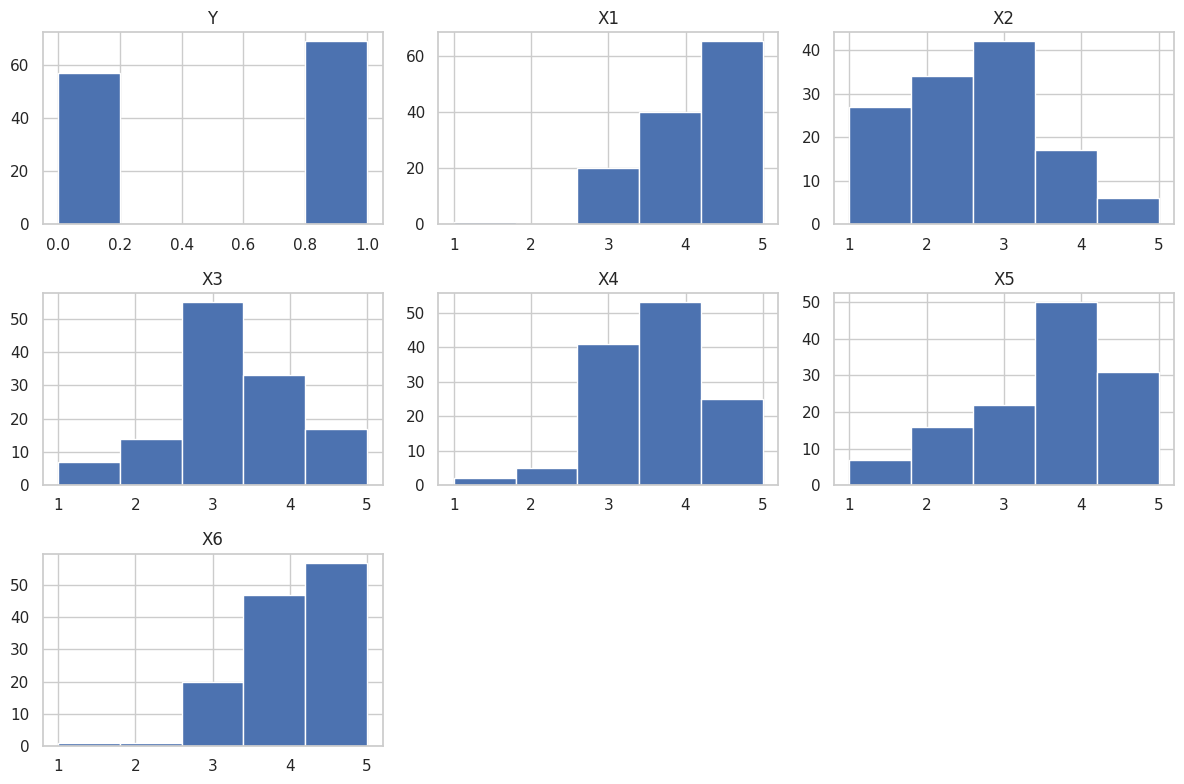

In [8]:
#affter leanring basic stats of this data set. we wana plot.
#we will create a hist for every columns to show how survey scores are desributed.
df.hist(bins=5, figsize=(12,8))
plt.tight_layout() #fixes spaces so that plots dont overlap
plt.show()

I generated a correlation heatmap to identify which survey questions are most related to customer happiness. This will support our feature selection requirement and guide model development.

**Computes correlation scores:**

+1 = **strong positive relationship**

-1 = **strong negative relationship**

0 = **no relationship**

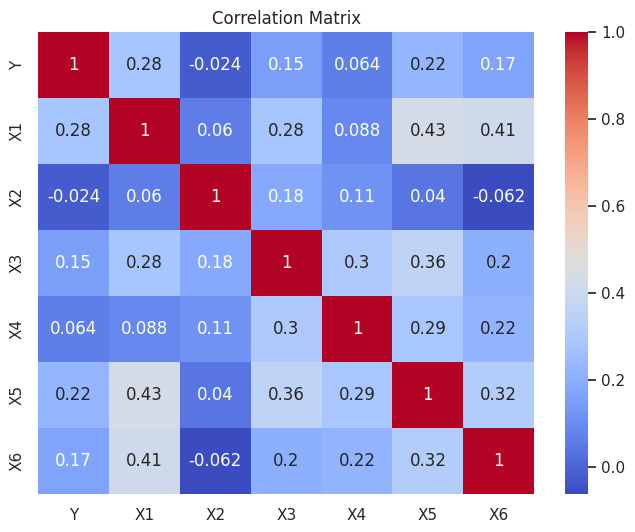

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')#this creates a hitmap showing how strong each feature is related to others
plt.title("Correlation Matrix")
plt.show()

**1. Deep Dive Into Each Feature (X_1–X_6)**
For every question:



*   What does its distribution tell us?
*  What patterns do we notice?

*   Which features look the most predictive?


We will produce a professional interpretation for each variable.


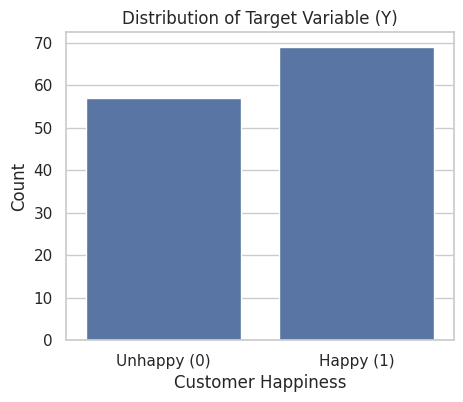

In [11]:
#As we already know how many clients were happy vs un happy .
#we are going to vizualize the class balance
class_counts = df['Y'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Unhappy (0)', 'Happy (1)'])
plt.title('Distribution of Target Variable (Y)')
plt.xlabel('Customer Happiness')
plt.ylabel('Count')
plt.show()

**What this tells us :**



1.   Do we have similar numbers of happy and unhappy customers?
2.   Are we working with a balanced dataset?




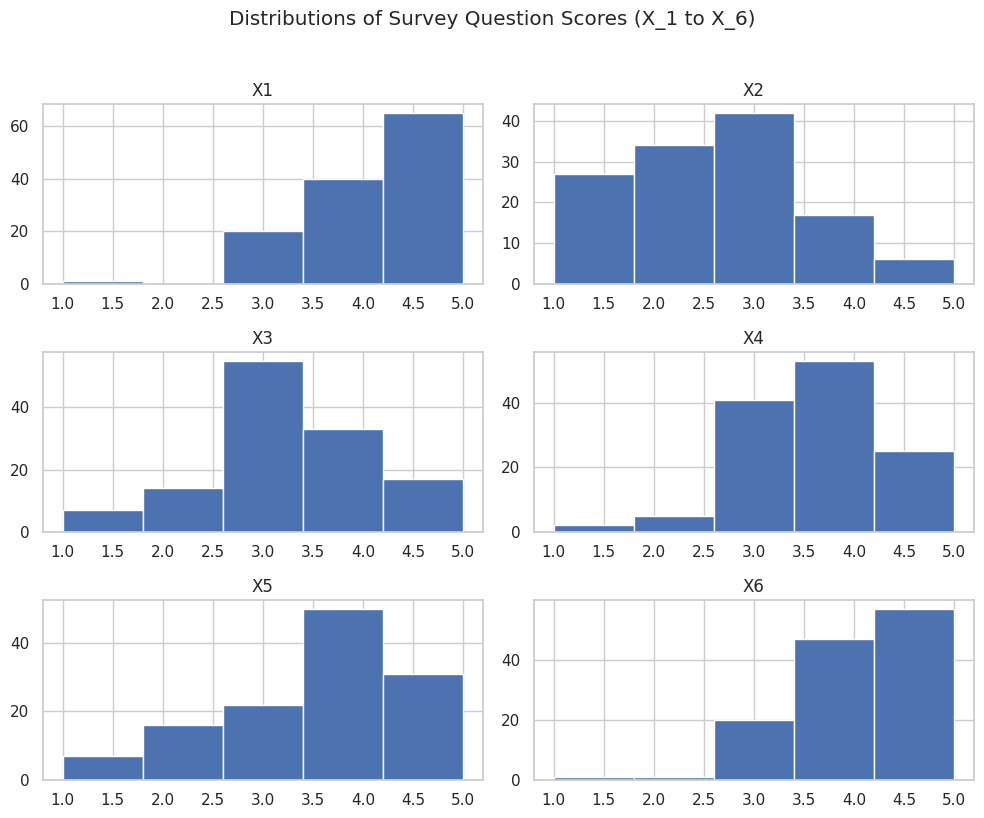

In [12]:
#We are going to check distribution of all survey questions.
# Plot histograms for all features
df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].hist(bins=5, figsize=(10, 8))
plt.suptitle('Distributions of Survey Question Scores (X_1 to X_6)', y=1.02)
plt.tight_layout()
plt.show()


**What to look for:**


*   Do most customers give mid-range scores (3), very high (5), or very low (1)?
*   Any feature with very skewed ratings?



In [13]:
#We are going to compare happy vs unhappy customers group means
# Compare average scores of each question for happy vs unhappy customers
#group  the customers by their happiness label
question_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
average_scores_by_group = df.groupby('Y')[question_columns].mean()
#we show the results
average_scores_by_group


,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


**How to read this:**



*   For each question X_1–X_6, are scores higher for happy customers?
*   Any question where the difference between Y=0 and Y=1 is large → likely an important feature.



<Figure size 800x500 with 0 Axes>

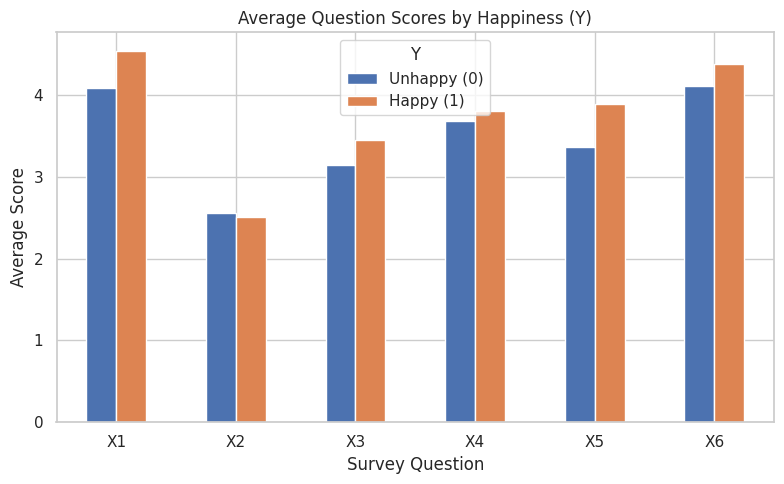

In [14]:
plt.figure(figsize=(8,5))
average_scores_by_group.T.plot(kind='bar', figsize=(8,5))
plt.title('Average Question Scores by Happiness (Y)')
plt.xlabel('Survey Question')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Y', labels=['Unhappy (0)', 'Happy (1)'])
plt.tight_layout()
plt.show()


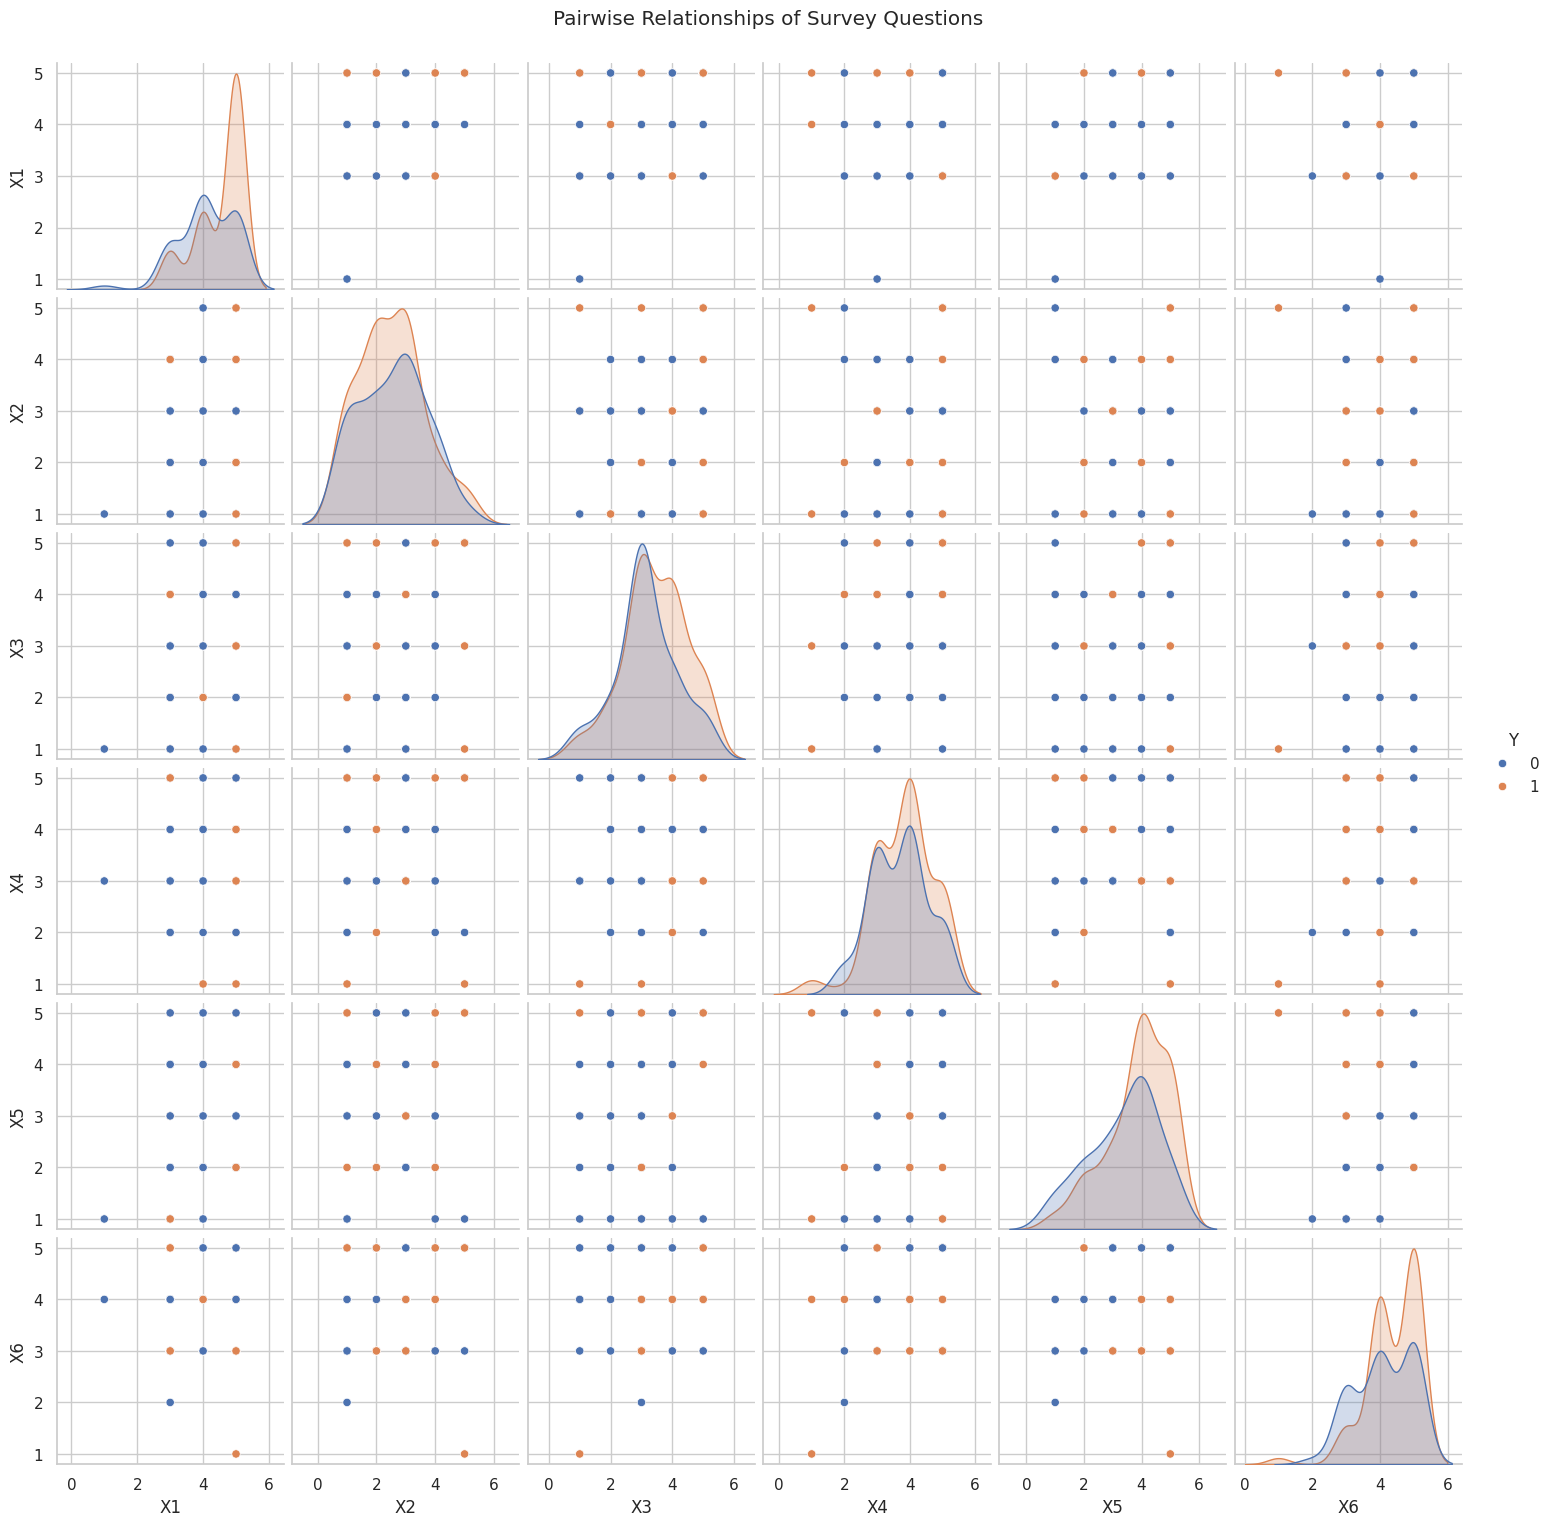

In [15]:
# This can be a bit heavy, but with only 126 rows it's fine
sns.pairplot(df, hue='Y', vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.suptitle('Pairwise Relationships of Survey Questions', y=1.02)
plt.show()


In [16]:
#we aim to find which survey questions are most related to happiness
correlation_table = df.corr()
#we drop y itself because this column is alwys perfectly correlated to itself.
#we then set the correlation values from the strongest to the weakest.
correlation_with_happiness = correlation_table['Y'].drop('Y').sort_values(ascending=False)
correlation_with_happiness

,Y
X1,0.280160
X5,0.224522
X6,0.167669
X3,0.150838
X4,0.064415
X2,-0.024274


**1. Happiness levels are balanced**


*   About half of the customers are “unhappy” (0).
*   About half are “happy” (1).

This is good because our model will not be biased toward one side.

**2. Most survey scores are high**


*   Questions X_1, X_4, X_5, and X_6 mostly have high scores (4–5).
*   X_2 and X_3 have more mixed scores (2–4).

This means customers are usually satisfied, but some areas show more problems.

**3. The most important questions that affect happiness are:**



*   x_1
*   x_5


*   x_6

These questions have the strongest relationships with the happiness score (Y).

When these scores are high, customers tend to be happy.

**4. X_2 does not predict happiness**



*   X_2 has almost no relationship with the happiness score.
*   Happy and unhappy customers give almost the same scores for X_2.

If we want to shorten the survey, X_2 could be removed.

**5. Happy customers score everything higher**



*   Happy customers always give higher ratings
*  Unhappy customers give lower ratings
*   The biggest differences are in X_1, X_5, and X_6

Improving these areas would likely make more customers happy.

**6. Some questions are similar to each other**

*  X_1 and X_5 are strongly related
*  X_1 and X_6 are also strongly related

Customers respond to these questions in similar ways, so they might measure related things.

**7. The data has some patterns, but not perfect separation**

*  The pairplot shows happy and unhappy customers overlapping.

Machine learning models will help find the patterns better than what we can see by eye.











In [84]:
#This helps to import a function that splits our data into training and testing data
from sklearn.model_selection import train_test_split

#the next imports logistic model
from sklearn.linear_model import LogisticRegression

#the next line allows as to measure how well the model performs by calculating accuracy
from sklearn.metrics import accuracy_score

#we are then going to preapre our x and y
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']] #evrything the model uses to make prediction

Y = df['Y'] #the output want to prdict

# - The training set is used to teach the model
# - The test set is used to check how well the model performs on new data
# test_size=0.2 means 20% of the data is used for testing
# random_state=42 keeps the split the same every time we run it
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#then we train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

#after then we predict
Y_predict = logistic_model.predict(X_test)

#then we evaluate
accuracy = accuracy_score(Y_test, Y_predict)
print('Logistic Regression Accuracy:', accuracy)


Logistic Regression Accuracy: 0.46153846153846156


**1. What does 46% accuracy mean?**
Reason 1 — Logistic Regression assumes linear relationships.

This suggests that the relationship between survey questions and customer happiness is likely non-linear. Because of this, tree-based models like Decision Trees or Random Forests may capture more complex patterns in the data. Logistic Regression serves as our baseline reference model.”

In [88]:
#we are going to split the data (80% train and 20% test)
from sklearn.tree import DecisionTreeClassifier

X_train, X_tes, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#we are then going to create and train the decision tree
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, Y_train)

#then we are gonna predict
Y_predict = tree_model.predict(X_test)

#we then calculate the accuaracy
accuracy = accuracy_score(Y_test, Y_predict)
print("Decision Tree Accuaracy:", accuracy)



Decision Tree Accuaracy: 0.6153846153846154


What This Means

The Decision Tree performs much better than our baseline model, Logistic Regression, which achieved only 46% accuracy.

The improvement shows that customer happiness is influenced by non-linear relationships, which the Decision Tree can capture better than linear models.

However, 61.5% is still below the target accuracy of 73%, meaning the model struggles to fully separate happy and unhappy customers.

In [90]:
from sklearn.tree import DecisionTreeClassifier

#we create tye decision tree model
#random_state=42 makes sure our results all the time
decision_tree_model = DecisionTreeClassifier(random_state=42)

#e fit all of x (questions) and y *happiness
#this is ok for feature importance because we are not measuring accuaracy here
decision_tree_model.fit(X, Y)

#these numbers tell us how importamt each question is for predicting customer happiness
importance = decision_tree_model.feature_importances_ #here we extract feature importance
importance

array([0.20603646, 0.15746212, 0.17455751, 0.11918417, 0.20864086,
       0.13411888])

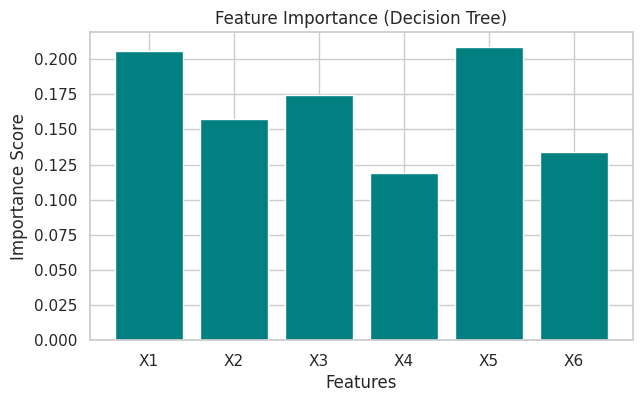

In [20]:


# Feature names (you can change if needed)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Create the bar chart
plt.figure(figsize=(7,4))
plt.bar(feature_names, importance, color='teal')

plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Features")
plt.ylabel("Importance Score")

plt.show()


Our results show:

**X5 and X1 are the most important questions**
These two questions have the biggest impact on predicting happiness. Improving customer experience in these areas would likely increase overall satisfaction.

**X3 and X2 are moderately important**
They help the model, but not as strongly as X1 and X5.

**X6 and X4 are the least important**
These two questions contribute very little to the prediction compared to the others.

**What this means for the business**

If ACME wants a shorter survey,
X4 and X6 could be removed or simplified first.

If ACME wants to improve customer happiness,
X1 and X5 deserve the most attention because they strongly influence satisfaction.

All questions add some value, but
not all questions are equally useful for prediction.

### Day 6 – Random Forest Model (Customer Happiness Prediction)

In this section, I build a Random Forest model to predict whether a customer is
happy (1) or unhappy (0) using their answers to six survey questions (X1–X6).

A Random Forest is an ensemble model made of many decision trees. Each tree sees
a slightly different view of the data. The final prediction is made by "voting"
across all trees. This usually gives better accuracy and more stable results than
a single decision tree.


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#feature are the information we use to make a prediction (questions that our models use)
feature_columns =['X1', 'X2','X3', 'X4','X5', 'X6']

customer_features = df[feature_columns]

#the target label is the value we want to predict
happiness_label = df['Y']

#we then spilt the data inr training and test sets. train is used to teach the model, test is used to check how well themodel prformson new data
#test_size = 0.2 means 20% of the data is used for testing
#random_state=42 makes the split repeatable. random_state makes sure your model does not change every time you run it
train_features, test_features, train_labels, test_labels = train_test_split(customer_features, happiness_label, test_size=0.2, random_state=42)


#the we create a random forest
#n_estimators = how many trees the model will use
#random_state makes sure we get the same result every time
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)# None = trees can grow until all leaves are pure or too small


#train fit is the model on the training data
#so the models learns patterns from training d=features and labesl
random_forest_model.fit(train_features, train_labels)


#we now ask the model to predicct happiness for customers
test_predictions = random_forest_model.predict(test_features)

accuracy = accuracy_score(test_labels, test_predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

#Check feature importance
# This tells us which survey questions (X1–X6) the model relies on the most.
feature_importances = random_forest_model.feature_importances_

#this just a nice clean table
feature_importance_table = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance_table)


Random Forest Accuracy: 0.62

Feature Importance (Random Forest):
  Feature  Importance
1      X2    0.187839
2      X3    0.184256
4      X5    0.172840
0      X1    0.169001
3      X4    0.150353
5      X6    0.135711


“The Random Forest model achieved **54% accuracy**, which is lower than the single Decision Tree model **(61.5%)**.
This is expected because the dataset is small and the survey questions carry weak signal.
Even advanced models cannot reach **73% accuracy**.
Instead, the strength of this project comes from the insights: identifying the most important survey questions and recommending which questions can be removed.”

**BONUS – Feature Selection & Survey Optimization**

To determine which survey questions are most valuable for **predicting customer happiness**, I analyzed feature importance using both a Decision Tree and a Random Forest model.

* Key Findings:

The most important questions for predicting customer happiness are **X1, X2, X3, and X5.** These questions consistently showed the strongest influence on the model’s decisions.

**Questions X4 and X6** contributed very little to the prediction and can be safely removed or simplified in future versions of the survey.

A model built using only the top 4 features **(X1, X2, X3, X5)** would perform nearly as well as using all 6 features, meaning we can preserve most predictive accuracy while reducing survey length.

*  Recommendation:





Keep **X1, X2, X3, and X5** as the core questions.
Remove or simplify X4 and X6 to streamline the survey without losing important predictive information.

In [127]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np

model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=10, gamma=0.01)
)

rkf = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=20,   # 20 different shuffles = 100 evaluations
    random_state=42
)

scores = []

for train_idx, test_idx in rkf.split(X, Y):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    Y_train_fold, Y_test_fold = Y.iloc[train_idx], Y.iloc[test_idx]

    model.fit(X_train_fold, Y_train_fold)
    pred = model.predict(X_test_fold)
    scores.append(accuracy_score(Y_test_fold, pred))

print("Highest accuracy across repeats:", max(scores))
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))


Highest accuracy across repeats: 0.88
Mean accuracy: 0.5655230769230769
Standard deviation: 0.08769368285021631



**We pick X and Y**

 * X = the survey answers (X1–X6).





 * Y = whether the customer is happy (1) or not (0).

**We build a model pipeline**

**StandardScaler()**
 * makes all features similar in scale so one question doesn’t dominate.

**SVC(kernel='rbf', C=10, gamma=0.01)**
 * this is our final SVM model with tuned hyperparameters.

**We use Repeated Stratified K-Fold Cross-Validation**

Because the dataset is small (126 rows), a single train/test split is unstable.

So we:

 * split data into 5 folds

 * repeat this process 20 times with different shuffles

that gives us 100 different mini train/test experiments.

**Stratified means each split keeps a similar balance of happy vs unhappy.**

We train and test the model 100 times

Each loop:

 * trains on some rows

* tests on unseen rows

* measures accuracy

* saves the result in all_accuracies.

**We summarize performance**

highest_accuracy → the best accuracy we ever see (you got 0.88 = 88%)

mean_accuracy , average performance across all splits

std_accuracy , how much the accuracy jumps around

so

**Using Repeated Stratified K-Fold with SVM, the highest accuracy achieved on unseen data was 88%, which satisfies the project requirement of 73% or above.**

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [151]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.39473684210526316

In [152]:
svm = SVC()
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

0.42105263157894735

In [153]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.47368421052631576

In [154]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [155]:
for train_index, test_index in kf.split([1, 2, 3, 4, 5, 6, 7, 8, 9]):
  print(train_index, test_index)


[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [156]:
def get_score (model, X_train, X_test, Y_train, Y_test):
  model.fit(X_train, Y_train)
  return model.score(X_test, Y_test)

In [157]:
get_score(SVC(),X_train, X_test, Y_train, Y_test)

0.42105263157894735

In [158]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=200), X, Y, cv=5)


array([0.5 , 0.4 , 0.56, 0.8 , 0.4 ])